#DATA SCIENCE INTERN @BHARAT INTERN
###Project by : Ajit Yadav
#TASK 1 : STOCK PREDICTION
###PURPOSE : TO PREDICT THE STOCK PRICE OF A COMPANY USING LSTM (Long Short-Term Memory).
###ABOUT DATASET
####Google Stock Prediction


##Content

#####This dataset contains historical data of Google's stock prices and related attributes. It consists of 14 columns and a smaller subset of 1257 rows. Each column represents a specific attribute, and each row contains the corresponding values for that attribute.
<br>

#####The columns in the dataset are as follows: <br>

<br>

###### 1. **Symbol** : The name of the company, which is GOOG in this case.
###### 2. **Date** : The year and date of the stock data.
###### 3. **Close** : The closing price of Google's stock on a particular day.
###### 4. **High** : The highest value reached by Google's stock on the given day.
###### 5. **Low** : The lowest value reached by Google's stock on the given day.
###### 6. **Open** : The opening value of Google's stock on the given day.
###### 7. **Volume** : The trading volume of Google's stock on the given day, i.e., the number of shares traded.
###### 8. **adjClose** : The adjusted closing price of Google's stock, considering factors such as dividends and stock splits.
###### 9. **adjHigh** : The adjusted highest value reached by Google's stock on the given day.
###### 10. **adjLow** : The adjusted lowest value reached by Google's stock on the given day.
###### 11. **adjOpen** : The adjusted opening value of Google's stock on the given day.
###### 12. **adjVolume** : The adjusted trading volume of Google's stock on the given day, accounting for factors such as stock splits.
###### 13. **divCash** : The amount of cash dividend paid out to shareholders on the given day.
###### 14. **splitFactor** : The split factor, if any, applied to Google's stock on the given day. A split factor of 1 indicates no split.

<br>

###### The dataset is available at Kaggle : https://www.kaggle.com/datasets/shreenidhihipparagi/google-stock-prediction


##STEPS INVOLVED :
####1. IMPORTING LIBRARIES AND DATA TO BE USED
####2. GATHERING INSIGHTS
####3. DATA PRE-PROCESSING
####4. CREATING LSTM MODEL
####5. VISUALIZING ACTUAL VS PREDICTED DATA
####6. PREDICTING UPCOMING 15 DAYS

##STEP 1 : IMPORTING NECESSARY LIBRARIES AND TEH DATA TO BE USED

In [ ]:
#Importing Necessary libraries to be used

import numpy as np # for linear algebra
import pandas as pd # data preprocessing
import matplotlib.pyplot as plt # data visualization library
import seaborn as sns # data visualization library
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') # ignore warnings

from sklearn.preprocessing import MinMaxScaler # for normalization
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional

In [ ]:
#df = pd.read_csv('/content/drive/MyDrive/Bharat_Intern/GOOG.csv') # importing the data
df = pd.read_csv("/content/drive/MyDrive/Bharat_Intern/NFLX.csv")
df.head(5) # fetching first 5 rows of dataset

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


##STEP 2 : GATHERING INSIGHTS

In [ ]:
# shape of data
print("Shape of data:",df.shape)

Shape of data: (1009, 7)


In [ ]:
# statistical description of data
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


In [ ]:
# summary of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [ ]:
# checking null values
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

#####Inference : There are no null values in the dataset

In [ ]:
df = df[['Date','Open','Close']]  # Extracting required columns
df['Date'] = pd.to_datetime(df['Date'].apply(lambda x: x.split()[0])) # converting object dtype of date column to datetime dtype for real time and dynamic analysis
df.set_index('Date',drop=True,inplace=True) # Setting date column as index
df.head(10)

,Open,Close
Date,,
2018-02-05,262.000000,254.259995
2018-02-06,247.699997,265.720001
2018-02-07,266.579987,264.559998
2018-02-08,267.079987,250.100006
2018-02-09,253.850006,249.470001
2018-02-12,252.139999,257.950012
2018-02-13,257.290009,258.269989
2018-02-14,260.470001,266.000000
2018-02-15,270.029999,280.269989


array([[<Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'Close'}>]], dtype=object)

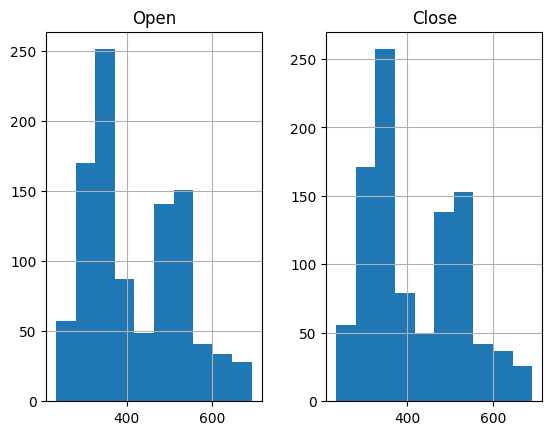

In [ ]:
df.hist()

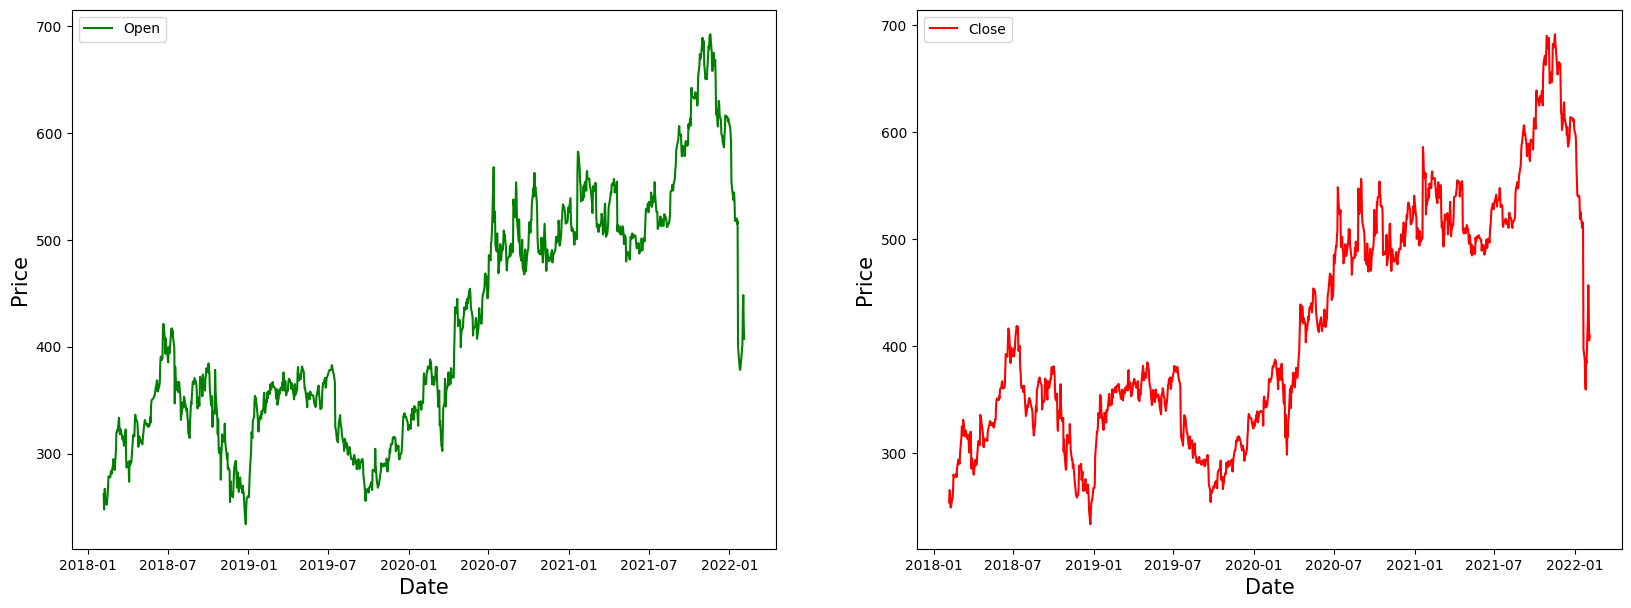

In [ ]:
# plotting open and closing price on date index

fig, ax =plt.subplots(1,2,figsize=(20,7))
ax[0].plot(df['Open'],label='Open',color='green')
ax[0].set_xlabel('Date',size=15)
ax[0].set_ylabel('Price',size=15)
ax[0].legend()

ax[1].plot(df['Close'],label='Close',color='red')
ax[1].set_xlabel('Date',size=15)
ax[1].set_ylabel('Price',size=15)
ax[1].legend()

fig.show()

##STEP 3 : DATA PRE-PROCESSING

In [ ]:
# Normalizing all the values of all columns using MinMaxScaler function ()
MMS = MinMaxScaler()
df[df.columns] = MMS.fit_transform(df)
df.head(10)

,Open,Close
Date,,
2018-02-05,0.061253,0.044516
2018-02-06,0.030059,0.069548
2018-02-07,0.071243,0.067015
2018-02-08,0.072334,0.035430
2018-02-09,0.043474,0.034053
2018-02-12,0.039744,0.052576
2018-02-13,0.050978,0.053275
2018-02-14,0.057915,0.070160
2018-02-15,0.078769,0.101330


In [ ]:
df.tail(10)

,Open,Close
Date,,
2022-01-24,0.327182,0.334790
2022-01-25,0.316777,0.289509
2022-01-26,0.314879,0.274830
2022-01-27,0.323146,0.333807
2022-01-28,0.333399,0.328695
2022-01-31,0.366577,0.422140
2022-02-01,0.434178,0.487648
2022-02-02,0.467531,0.427251
2022-02-03,0.409048,0.375090


#####Inference: Transform features by scaling each feature to a given range [0,1], as there are no negative values.

In [ ]:
# Splitting the data into training and test set
training_size = round(len(df) * 0.75) # Selecting 75 % for training and 25 % for testing
training_size

757

In [ ]:
train_data = df[:training_size]
test_data  = df[training_size:]

train_data.shape, test_data.shape

((757, 2), (252, 2))

In [ ]:
# Function to create sequence of data for training and testing

def create_sequence(dataset):
  sequences = []
  labels = []

  start_idx = 0

  for stop_idx in range(50,len(dataset)): # Selecting 50 rows at a time
    sequences.append(dataset.iloc[start_idx:stop_idx])
    labels.append(dataset.iloc[stop_idx])
    start_idx += 1
  return (np.array(sequences),np.array(labels))

In [ ]:
train_seq, train_label = create_sequence(train_data)
test_seq, test_label = create_sequence(test_data)
train_seq.shape, train_label.shape, test_seq.shape, test_label.shape

((707, 50, 2), (707, 2), (202, 50, 2), (202, 2))

##STEP 4 : CREATING A LSTM MODEL

In [ ]:
# Imported Sequential from keras.models
# importing Dense, Dropout, LSTM, Bidirectional from keras.layers

model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape = (train_seq.shape[1], train_seq.shape[2])))

model.add(Dropout(0.1))
model.add(LSTM(units=50))

model.add(Dense(2))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 50, 50)            10600     
                                                                 
 dropout_1 (Dropout)         (None, 50, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 2)                 102       
                                                                 
Total params: 30902 (120.71 KB)
Trainable params: 30902 (120.71 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Fitting the model by iterating the dataset over 100 times(100 epochs)

model.fit(train_seq, train_label, epochs=100,validation_data=(test_seq, test_label), verbose=1)

Epoch 1/100
23/23 [==============================] - 6s 95ms/step - loss: 0.0271 - mean_absolute_error: 0.1129 - val_loss: 0.0338 - val_mean_absolute_error: 0.1544
Epoch 2/100
23/23 [==============================] - 1s 53ms/step - loss: 0.0040 - mean_absolute_error: 0.0483 - val_loss: 0.0081 - val_mean_absolute_error: 0.0666
Epoch 3/100
23/23 [==============================] - 1s 59ms/step - loss: 0.0025 - mean_absolute_error: 0.0376 - val_loss: 0.0059 - val_mean_absolute_error: 0.0528
Epoch 4/100
23/23 [==============================] - 2s 85ms/step - loss: 0.0022 - mean_absolute_error: 0.0355 - val_loss: 0.0059 - val_mean_absolute_error: 0.0519
Epoch 5/100
23/23 [==============================] - 2s 83ms/step - loss: 0.0021 - mean_absolute_error: 0.0352 - val_loss: 0.0055 - val_mean_absolute_error: 0.0506
Epoch 6/100
23/23 [==============================] - 1s 52ms/step - loss: 0.0021 - mean_absolute_error: 0.0346 - val_loss: 0.0054 - val_mean_absolute_error: 0.0496
Epoch 7/100
23/2

In [ ]:
# predicting the values after running the model
test_predicted = model.predict(test_seq)
test_predicted[:5]

7/7 [==============================] - 1s 14ms/step


array([[0.6648442, 0.668402 ],
       [0.5714446, 0.5809604],
       [0.5839639, 0.5900858],
       [0.5789692, 0.5856941],
       [0.5885138, 0.5948861]], dtype=float32)

In [ ]:
# Inversing normalization/scaling on predicted data
test_inverse_predicted = MMS.inverse_transform(test_predicted)
test_inverse_predicted[:5]

array([[538.70447, 539.8811 ],
       [495.8873 , 499.8495 ],
       [501.62656, 504.02716],
       [499.3368 , 502.01663],
       [503.71234, 506.2248 ]], dtype=float32)

##STEP 5 : VISUALIZING ACTUAL DATA VS PREDICTED DATA

In [ ]:
# Merging actual and predicted data for better visualization
df_merge = pd.concat([df.iloc[-202:].copy(),
                          pd.DataFrame(test_inverse_predicted,columns=['open_predicted','close_predicted'],
                                       index=df.iloc[-202:].index)], axis=1)

In [ ]:
# Inversing normalization/scaling
df_merge[['Open','Close']] = MMS.inverse_transform(df_merge[['Open','Close']])
df_merge.head()

,Open,Close,open_predicted,close_predicted
Date,,,,
2021-04-21,508.000000,508.899994,538.704468,539.881104
2021-04-22,513.820007,508.779999,495.887299,499.849487
2021-04-23,509.010010,505.549988,501.626556,504.027161
2021-04-26,506.760010,510.299988,499.336792,502.016632
2021-04-27,512.619995,505.549988,503.712341,506.224792


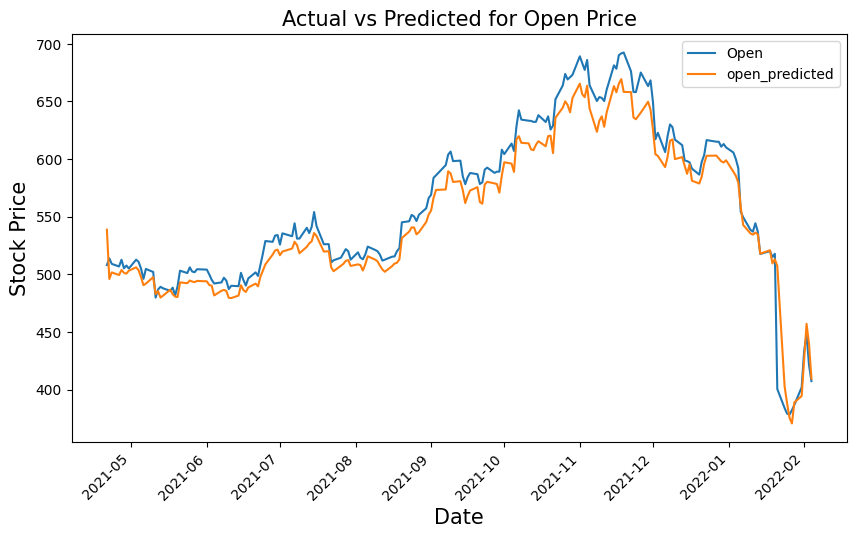

In [ ]:
# plotting the actual open and predicted open prices on date index
df_merge[['Open','open_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for Open Price',size=15)
plt.show()

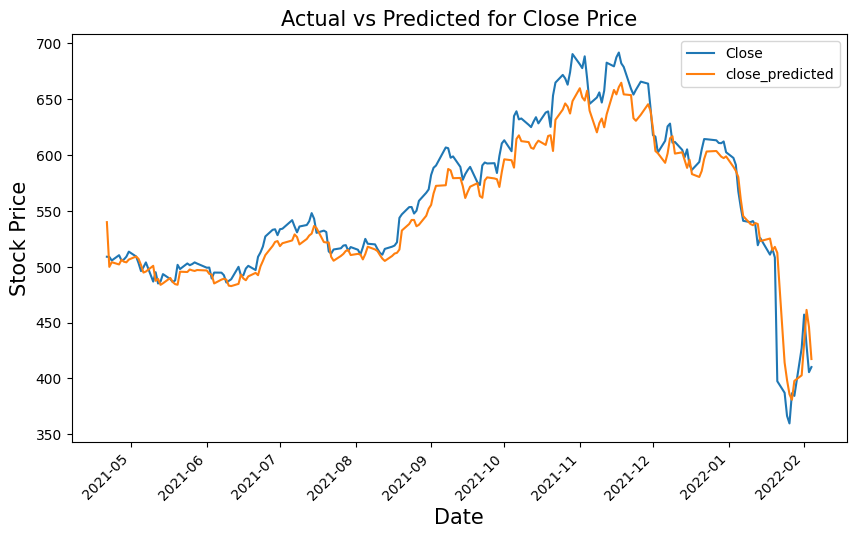

In [ ]:
# plotting the actual close and predicted close prices on date index
df_merge[['Close','close_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for Close Price',size=15)
plt.show()

##STEP 6. PREDICTING UPCOMING 10 DAYS

In [ ]:
# Creating a dataframe and adding 10 days to existing index

df_merge = df_merge.append(pd.DataFrame(columns=df_merge.columns,
                                        index=pd.date_range(start=df_merge.index[-1], periods=11, freq='D', closed='right')))
df_merge['2021-06-09':'2021-06-16']

,Open,Close,open_predicted,close_predicted
2021-06-09,494.500000,485.809998,485.491943,488.428375
2021-06-10,487.170013,487.269989,479.568359,483.028168
2021-06-11,490.000000,488.769989,479.328735,482.647186
2021-06-14,489.679993,499.890015,481.494476,484.632507
2021-06-15,501.230011,491.899994,490.516266,492.987213
2021-06-16,495.000000,492.410004,486.283875,489.426178


In [ ]:
# creating a DataFrame and filling values of open and close column
upcoming_prediction = pd.DataFrame(columns=['open','close'],index=df_merge.index)
upcoming_prediction.index=pd.to_datetime(upcoming_prediction.index)

In [ ]:
curr_seq = test_seq[-1:]

for i in range(-10,0):
  up_pred = model.predict(curr_seq)
  upcoming_prediction.iloc[i] = up_pred
  curr_seq = np.append(curr_seq[0][1:],up_pred,axis=0)
  curr_seq = curr_seq.reshape(test_seq[-1:].shape)

1/1 [==============================] - 0s 26ms/step


In [ ]:

# Inversing Normalization/scaling

upcoming_prediction[['open','close']] = MMS.inverse_transform(upcoming_prediction[['open','close']])

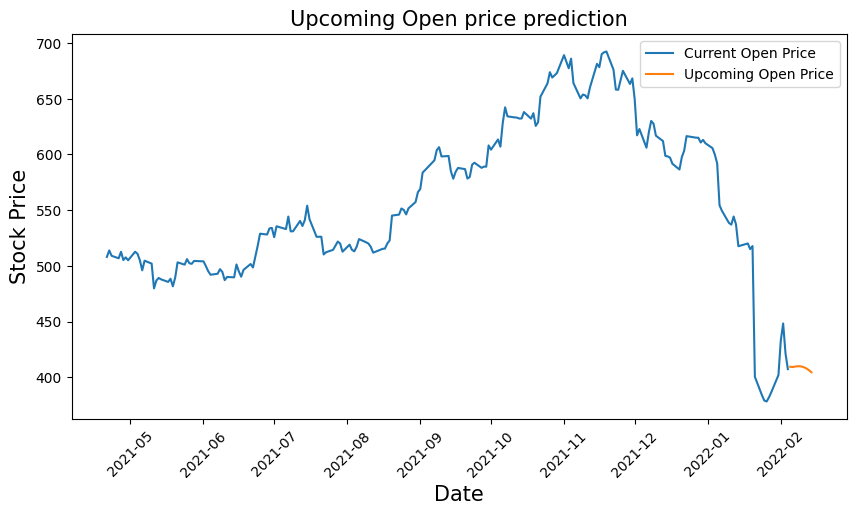

In [ ]:
# Plotting Upcoming Open price on date index

fig,ax=plt.subplots(figsize=(10,5))
ax.plot(df_merge.loc['2021-04-01':,'Open'],label='Current Open Price')
ax.plot(upcoming_prediction.loc['2021-04-01':,'open'],label='Upcoming Open Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Stock Price',size=15)
ax.set_title('Upcoming Open price prediction',size=15)
ax.legend()
fig.show()

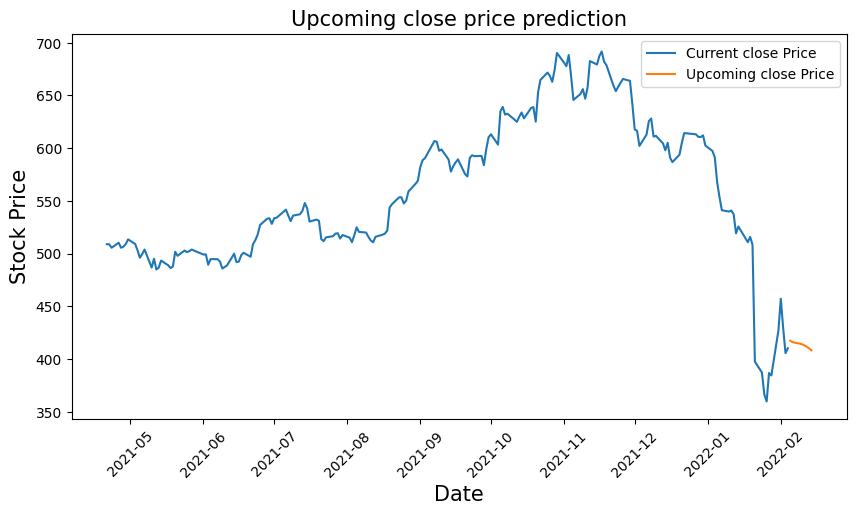

In [ ]:
# Plotting Upcoming Close price on date index

fig,ax=plt.subplots(figsize=(10,5))
ax.plot(df_merge.loc['2021-04-01':,'Close'],label='Current close Price')
ax.plot(upcoming_prediction.loc['2021-04-01':,'close'],label='Upcoming close Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Stock Price',size=15)
ax.set_title('Upcoming close price prediction',size=15)
ax.legend()
fig.show()

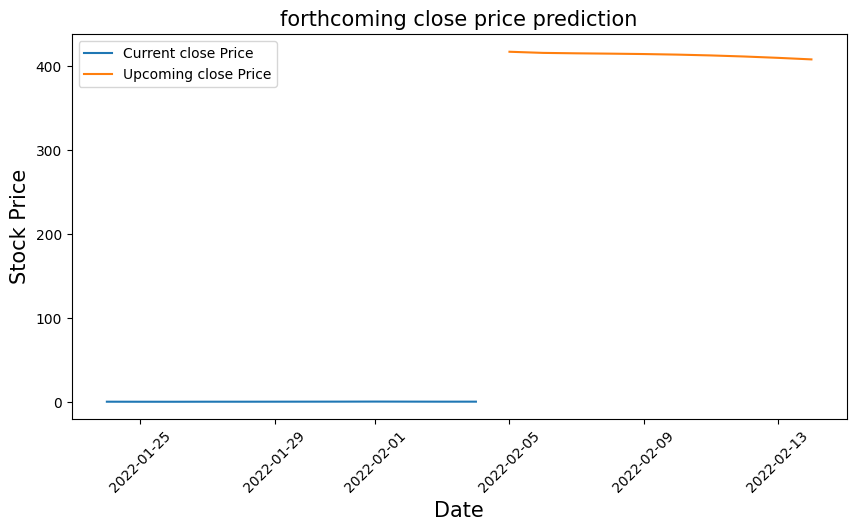

In [ ]:
# plotting Upcoming Open price on date index
fig,ax=plt.subplots(figsize=(10,5))
ax.plot(df.loc['2022-01-24':,'Close'],label='Current close Price')
ax.plot(upcoming_prediction.loc['2022-01-24':,'close'],label='Upcoming close Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Stock Price',size=15)
ax.set_title('forthcoming close price prediction',size=15)
ax.legend()
fig.show()